<p>&nbsp;</p>
<table>
<tbody>
<tr>
<td>
<p><strong>Author(s) Name</strong></p>
</td>
<td>The Machine Learners</td>
</tr>
<tr>
<td>
<p><strong>Model&rsquo;s Title</strong></p>
</td>
<td>OsloMet Summer Course Big Data Analytics Project</td>
</tr>
<tr>
<td>
<p><strong>Purpose</strong></p>
</td>
<td>Predicting Violent Crime in a Community in USA</td>
</tr>
<tr>
<td colspan="2">
<p><strong>Versioning:</strong></p>
<br />
<table>
<tbody>
<tr>
<td>
<p><span style="font-weight: 400;">Version Number</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Description</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Owner</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Date</span></p>
</td>
<td>
<p><span style="font-weight: 400;">Comments</span></p>
</td>
</tr>
<tr>
<td>v.1.0</td>
<td>Draft</td>
<td>Team</td>
<td>2019-07-05</td>
<td>Features: Income, Household, Geo-spatial features</td>
</tr>
<tr>
<td>v.1.1</td>
<td>Data Cleansing</td>
<td>Team</td>
<td>2019-07-05</td>
<td>Features: Fixing object-numeric conversions, missing values</td>
</tr>
</tbody>
</table>
</td>
</tr>
</tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',header=None)
df.columns = ['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPerRenterOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', 'pctHousOccup', 'pctHousOwnerOccup', 'pctVacantBoarded', 'pctVacant6up', 'medYrHousBuilt', 'pctHousWOphone', 'pctHousWOplumb', 'ownHousLowQ', 'ownHousMed', 'ownHousUperQ', 'ownHousQrange', 'rentLowQ', 'rentMed', 'rentUpperQ', 'rentQrange', 'medGrossRent', 'medRentpctHousInc', 'medOwnCostpct', 'medOwnCostPctWO', 'persEmergShelt', 'persHomeless', 'pctForeignBorn', 'pctBornStateResid', 'pctSameHouse-5', 'pctSameCounty-5', 'pctSameState-5', 'numPolice', 'policePerPop', 'policeField', 'policeFieldPerPop', 'policeCalls', 'policCallPerPop', 'policCallPerOffic', 'policePerPop2', 'racialMatch', 'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp', 'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits', 'numDiffDrugsSeiz', 'policAveOT', 'landArea', 'popDensity', 'pctUsePubTrans', 'policCarsAvail', 'policOperBudget', 'pctPolicPatrol', 'gangUnit', 'pctOfficDrugUnit', 'policBudgetPerPop', 'murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']
df_orig = df.copy()
df.head(5)


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?,?,?,?,0.0,?,3,8.3,6,16.6,56,154.95,14,38.74,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443

In [3]:
#Fixing missing vlaues with valid NaNs
df = df.replace('?',np.nan)

In [4]:
#Convert object columns that were supposed to be numeric to numeric
for col in df.select_dtypes('object').columns:
    if col not in ['communityname', 'State', 'countyCode', 'communityCode']:
        df[col] = pd.to_numeric(df[col])

<h2>Fixing Missing Values</h2>

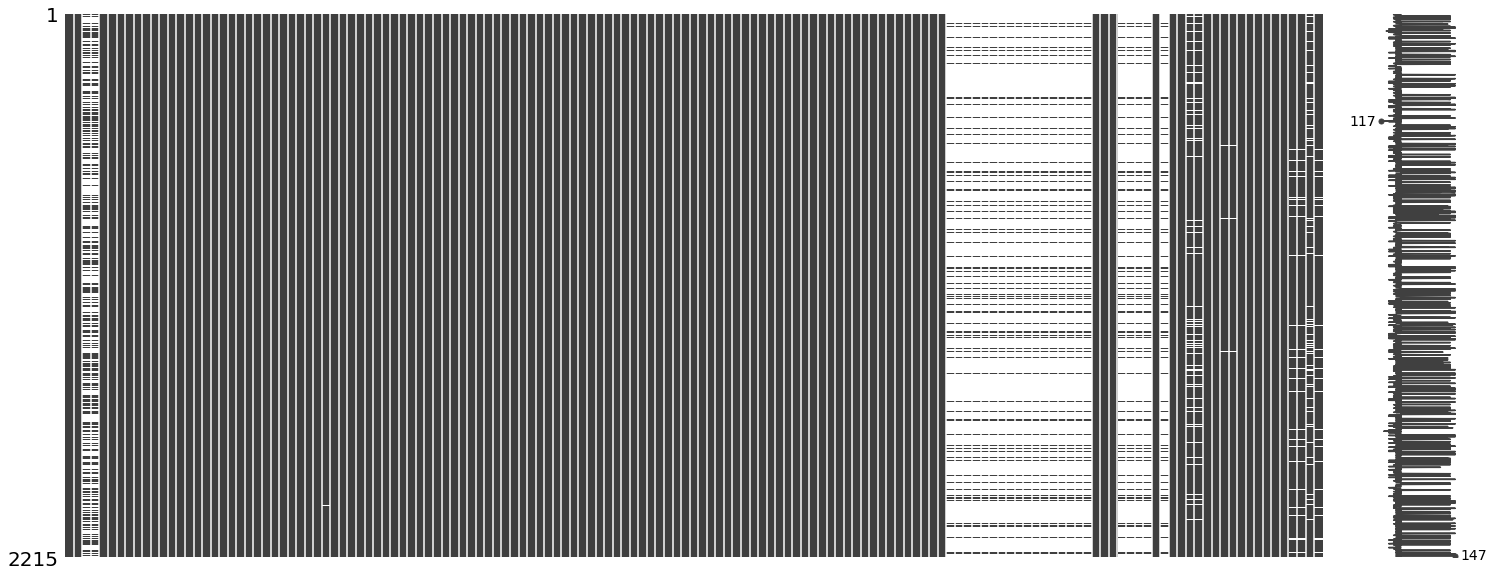

In [5]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [6]:
from sklearn.preprocessing import Imputer
imp  = Imputer(missing_values=np.nan,strategy="mean",axis=0)
df.iloc[:,5:] = imp.fit_transform(df.iloc[:,5:])
df.head(5)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980.0,100.0,75122.0,89.24,1.55,70.20,23.62,1.03,18.39,79584.0,29711.0,30233.0,13600.0,5725.0,27101.0,5115.0,22838.0,227.0,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31.0,0.36,1277.0,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3.0,64.0,98.37,91.01,3.12,37.50,1959.0,0.00,0.28,215900.0,262600.0,326900.0,111000.0,685.0,1001.0,1001.0,316.0,1001.0,23.8,21.1,14.0,11.0,0.0,10.66,53.72,65.29,78.09,89.14,499.198251,246.490962,432.559767,210.844781,252404.988338,120651.718892,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767,0.681283,15.242245,26.28863,8.816327,119.114286,6.5,1845.9,9.63,185.478134,3.217602e+07,87.130933,4.285714,0.0,153577.871224,0.0,0.0,0.000000,0.00000,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.020000,1394.590000
1,Marpletownship,PA,45,47616,1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123.0,100.0,47917.0,78.99,1.11,64.11,35.50,2.75,22.85,55323.0,20148.0,20191.0,18137.0,0.0,20074.0,5250.0,12222.0,885.0,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43.0,0.24,1920.0,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3.0,240.0,97.15,84.88,0.00,18.33,1958.0,0.31,0.14,136300.0,164200.0,199900.0,63600.0,467.0,560.0,672.0,205.0,627.0,27.6,20.7,12.5,0.0,0.0,8.30,77.17,71.27,90.22,96.12,499.198251,246.490962,432.559767,210.844781,252404.988338,120651.718892,523.658309,246.493586,85.499679,82.515831,9.263294,5.459767,0.681283,15.242245,26.28863,8.816327,119.114286,10.6,2186.7,3.84,185.478134,3.217602e+07,87.130933,4.285714,0.0,153577.871224,0.0,0.0,1.000000,4.25000,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.560000,1955.950000
2,Tigardcity,OR,NaN,NaN,1,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344.0,100.0,35669.0,82.00,1.15,55.73,22.25,2.94,14.56,42112.0,16

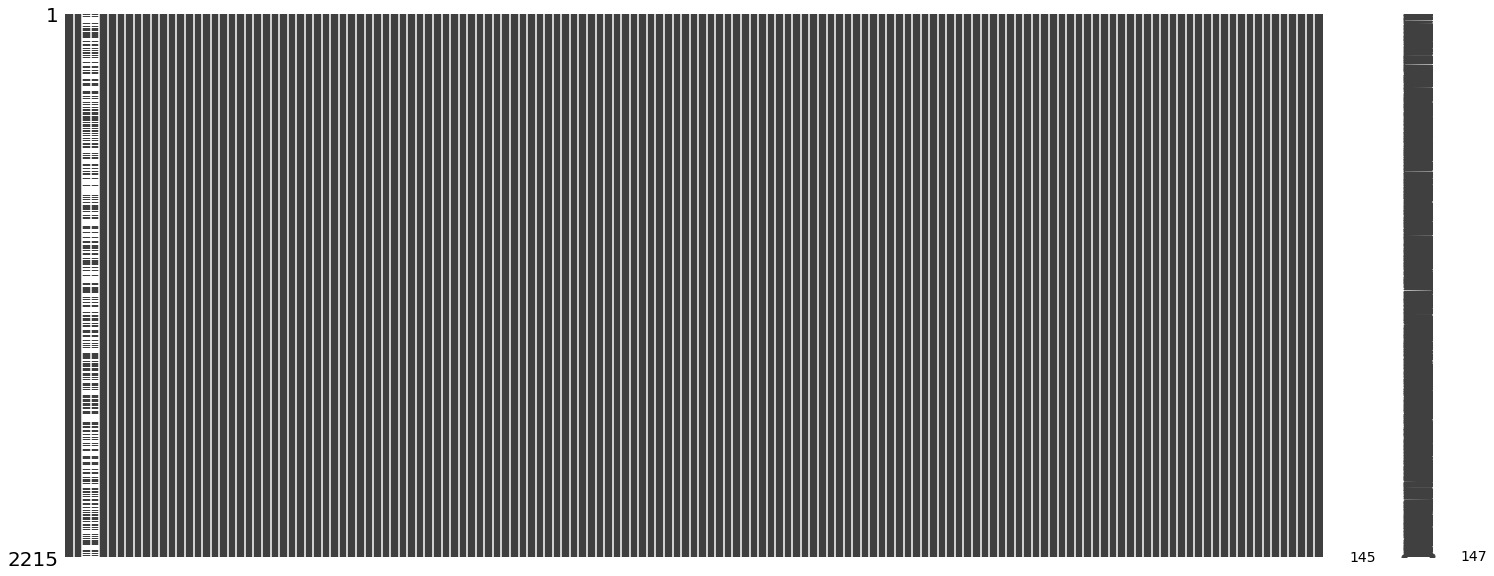

In [7]:
%matplotlib inline
import missingno as msno
msno.matrix(df)

In [8]:
#Adding Regions
regions=[]

for i in df["State"]:
    if i in ['AZ','NM','OK','TX']:
        regions.append('Southwest')
    elif i in ['AR','LA','MS','AL','GA','FL','TN','KY','SC','NC','VA','DC','WV','DE']:
        regions.append('Southeast')
    elif i in ['CA','NV','UT','CO','WY']:
        regions.append('West')
    elif i in ['OR','WA','ID','MT']:
        regions.append('Northwest')
    elif i in ['MD','PA','NJ','CT','RI','NY','MA','NH','VT','ME']:
        regions.append('Northeast')
    else:
        regions.append('Central')
        
#s1['Regions']=regions
df.insert(2,"Region",regions)

<h2>Column Selection</h2>

In [10]:
train_cols = [col for col in df if(
          'communityname' not in col
          and 'State' not in col
          and 'countyCode' not in col
          and 'communityCode' not in col
          and 'fold' not in col
          and col not in ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']
        )]

pred_cols = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']

pct_cols = [col for col in df if(col.startswith('pct'))]

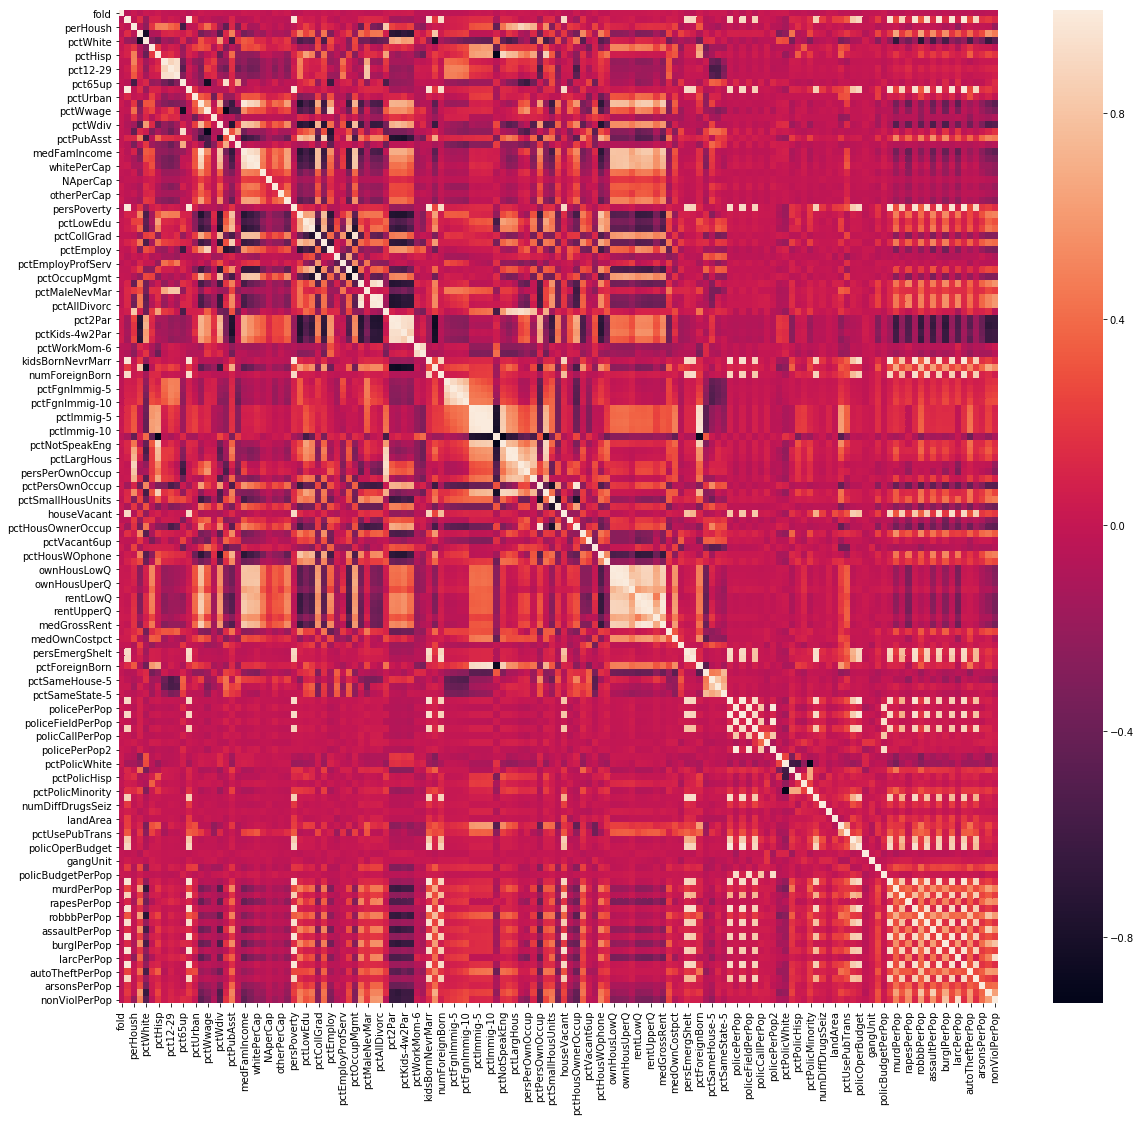

In [11]:
import seaborn as sns
a4_dims = (19.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(df.corr())

In [13]:
from bokeh.plotting import figure, output_file, show
p = figure(plot_width=400, plot_height=400, x_axis_label='pctLowEdu', y_axis_label='violentPerPop')
p.circle(df['medYrHousBuilt'], df['violentPerPop'], size=10, color="navy", alpha=0.5)
#show(p)

GlyphRenderer(id='1155', ...)

In [14]:
df_plotly = pd.DataFrame(df.groupby('State')['violentPerPop'].sum()/df.groupby('State')['State'].count()).reset_index()
df_plotly.columns = ['State','Value']
df_plotly
#.iloc[:,1:2].astype(float)

,State,Value
0,AK,576.576667
1,AL,1030.699070
2,AR,718.550400
3,AZ,551.094500
4,CA,809.675874
5,CO,526.861600
6,CT,269.852505
7,DC,3048.380000
8,DE,887.290000
9,FL,1159.046889


In [15]:
df.groupby('State')['violentPerPop'].sum()/df.groupby('State')['State'].count()

State
AK     576.576667
AL    1030.699070
AR     718.550400
AZ     551.094500
CA     809.675874
CO     526.861600
CT     269.852505
DC    3048.380000
DE     887.290000
FL    1159.046889
GA     973.413514
IA     406.452500
ID     271.530000
IL     589.078922
IN     499.966250
KS     874.690000
KY     682.575385
LA    1312.713636
MA     442.172259
MD    1217.699167
ME     151.487059
MI     589.078922
MN     579.833733
MO     446.006667
MS     659.826946
NC     973.036087
ND      85.055000
NH     181.722381
NJ     409.823507
NM     836.507000
NV     552.416000
NY     613.310000
OH     399.576467
OK     487.147500
OR     356.474194
PA     337.315446
RI     340.382692
SC    1233.455714
SD     226.461111
TN     723.771429
TX     617.874466
UT     231.439167
VA     514.033030
VT     116.107500
WA     547.444000
WI     180.595167
WV     433.875714
WY     295.865714
dtype: float64